# _Who Will Win Their Next Match_
### _The Pokemon Challenge_
#### Jean-Sebastien Provost

In [16]:
    # Importing libraries

    import pandas as pd
    import numpy as np
    from sklearn.linear_model import LogisticRegression
    from sklearn.svm import SVC
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.naive_bayes import GaussianNB
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.metrics import accuracy_score
    import matplotlib.pyplot as plt
    import seaborn as sns
    %matplotlib inline

In [17]:
    # Loading the dataset 
    pokemon = pd.read_csv("final_pokemon.csv")


In [18]:
    # Looking at the different features
    pokemon.columns.values

array(['Unnamed: 0', 'Loser', 'Winner', 'First_pokemon', 'Second_pokemon',
       'win', 'w_name', 'w_Type1', 'w_HP', 'w_attack', 'w_defense',
       'w_sp_atk', 'w_sp_def', 'w_Speed', 'w_Generation', 'w_Legendary',
       'w_wins', 'w_firstatk', 'w_firstdef', 'w_matches', 'w_watkfirst',
       'w_atksecond.x', 'w_probwatkfirst', 'w_probwsecond',
       'w_probWinning', 'l_name', 'l_Type1', 'l_HP', 'l_attack',
       'l_defense', 'l_sp_atk', 'l_sp_def', 'l_Speed', 'l_Generation',
       'l_Legendary', 'l_wins', 'l_firstatk', 'l_firstdef', 'l_matches',
       'l_watkfirst', 'l_atksecond', 'l_probwatkfirst', 'l_probwsecond',
       'l_probWinning'], dtype=object)

In [19]:
    # Inspecting the data
    pokemon.head(10)

,Unnamed: 0,Loser,Winner,First_pokemon,Second_pokemon,win,w_name,w_Type1,w_HP,w_attack,w_defense,w_sp_atk,w_sp_def,w_Speed,w_Generation,w_Legendary,w_wins,w_firstatk,w_firstdef,w_matches,w_watkfirst,w_atksecond.x,w_probwatkfirst,w_probwsecond,w_probWinning,l_name,l_Type1,l_HP,l_attack,l_defense,l_sp_atk,l_sp_def,l_Speed,l_Generation,l_Legendary,l_wins,l_firstatk,l_firstdef,l_matches,l_watkfirst,l_atksecond,l_probwatkfirst,l_probwsecond,l_probWinning
0,1,1,381,1,381,0,Armaldo,Rock,75,125,100,70,80,45,3,False,37,58,54,112,14,23,0.378378,0.621622,0.330357,Bulbasaur,Grass,45,49,49,65,65,45,1,False,37,70,63,133,12,25,0.324324,0.675676,0.278195
1,2,1,643,1,643,0,Swanna,Water,75,87,63,87,63,98,5,False,103,64,55,119,55,48,0.533981,0.466019,0.865546,Bulbasaur,Grass,45,49,49,65,65,45,1,False,37,70,63,133,12,25,0.324324,0.675676,0.278195
2,3,1,506,1,506,0,Carnivine,Grass,74,100,72,90,72,46,4,False,28,55,59,114,13,15,0.464286,0.535714,0.245614,Bulbasaur,Grass,45,49,49,65,65,45,1,False,37,70,63,133,12,25,0.324324,0.675676,0.278195
3,4,1,766,1,766,0,Heliolisk,Electric,62,55,52,109,94,109,6,False,94,66,54,120,52,42,0.553191,0.446809,0.783333,Bulbasaur,Grass,45,49,49,65,65,45,1,False,37,70,63,133,12,25,0.324324,0.675676,0.278195
4,5,1,357,357,1,1,Spoink,Psychic,60,25,35,70,80,60,3,False,36,68,49,117,23,13,0.638889,0.361111,0.307692,Bulbasaur,Grass,45,49,49,65,65,45,1,False,37,70,63,133,12,25,0.324324,0.675676,0.278195
5,6,1,112,1,112,0,Exeggutor,Grass,95,95,85,125,65,55,1,False,37,47,48,95,18,19,0.486486,0.513514,0.389474,Bulbasaur,Grass,45,49,49,65,65,45,1,False,37,70,63,133,12,25,0.324324,0.675676,0.278195
6,7,1,513,1,513,0,Weavile,Dark,70,120,65,45,85,125,4,False,116,72,47,119,70,46,0.603448,0.396552,0.974790,Bulbasaur,Grass,45,49,49,65,65,45,1,False,37,70,63,133,12,25,0.324324,0.675676,0.278195
7,8,1,161,1,161,0,Dragonair,Dragon,61,84,65,70,70,70,1,False,58,57,59,116,30,28,0.517241,0.482759,0.500000,Bulbasaur,Grass,45,49,49,65,65,45,1,False,37,70,63,133,12,25,0.324324,0.675676,0.278195
8,9,1,306,306,1,1,Gardevoir,Psychic,68,65,65,125,115,80,3,False,84,65,65,130,40,44,0.476190,0.523810,0.646154,Bulbasaur,Grass,45,49,49,65,65,45,1,False,37,70,63,133,12,25,0.324324,0.675676,0.278195
9,10,1,37,1,37,0,Nidoqueen,Poison,90,92,87,75,85,76,1,False,66,65,57,122,33,33,0.500000,0.500000,0.540984,Bulbasaur,Grass,45,49,49,65,65,45,1,False,37,70,63,133,12,25,0.324324,0.675676,0.278195


By inspecting the dataset, we can already identify some features that will not contribute to our analysis such as the name of the winner, the name of the loser as well as the identification number of the winner. Therefore, we will remove these features from our dataset.

In [20]:
    # Removing unnecessary features for now
    pokemon = pokemon.drop(["Unnamed: 0", "w_name", "l_name", "Loser", "Winner"], axis=1)

In our context, we are trying to predict the outcome of a match, so consequently we are using the "win" feature as our target feature. For this purpose, we will recode this feature in terms of "1" for a win, and "-1" for a loss.

In [21]:
    # Creating a new binary feature for identifying a win
    # Removing the previous variable from the dataset
    pokemon["win_by_first"] = pokemon["win"].apply(lambda x : +1 if x ==1 else -1)
    pokemon = pokemon.drop(["win"],1)

Let's look at the correlation matrix to identify possible features involved in multicollinearity which could affect Logistic Regression. Indeed, we can observe some features highly correlating

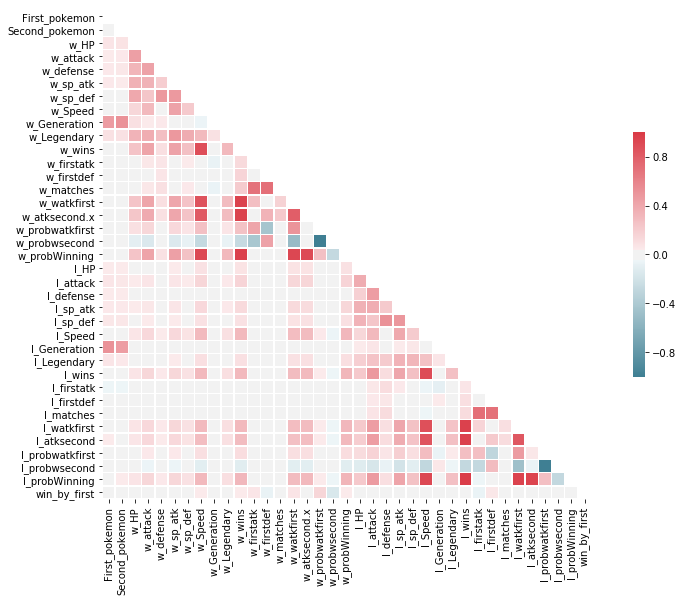

In [22]:
# Getting the correlation matrix and print all columns
corr_matrix = pokemon.corr(method='pearson', min_periods=1)
pd.options.display.max_columns = None

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [23]:
# Removing features that are correlating with each others or are the inverse
        # w_probwsecond: is the inverse of w_probwfirst
        # l_probwsecond: is the inverse of l_probwatksecond
        # l_wins: strong correlation with 3 other l_Speed, l_watkfirst, l_atksecond
        # w_wins: strong correlation with 3 other w_Speed, w_watkfirst, w_atksecond
pokemon = pokemon.drop([ "w_probwsecond", "l_probwsecond", "l_wins", "w_wins"],1)


In [24]:
pokemon.corr()

,First_pokemon,Second_pokemon,w_HP,w_attack,w_defense,w_sp_atk,w_sp_def,w_Speed,w_Generation,w_Legendary,w_firstatk,w_firstdef,w_matches,w_watkfirst,w_atksecond.x,w_probwatkfirst,w_probWinning,l_HP,l_attack,l_defense,l_sp_atk,l_sp_def,l_Speed,l_Generation,l_Legendary,l_firstatk,l_firstdef,l_matches,l_watkfirst,l_atksecond,l_probwatkfirst,l_probWinning,win_by_first
First_pokemon,1.000000,0.000923,0.072247,0.043649,0.047422,0.049415,0.024904,0.007252,0.466503,0.091619,-0.022253,-0.004514,-0.018973,0.035463,0.021788,0.021856,0.037600,0.042042,0.067899,0.041753,0.054008,0.055521,0.007177,0.517304,0.065461,-0.044591,0.022102,-0.016346,0.018879,0.044007,-0.025445,0.036126,0.033475
Second_pokemon,0.000923,1.000000,0.080307,0.054267,0.060038,0.046452,0.029562,-0.004693,0.521526,0.091717,-0.034767,-0.003028,-0.026747,0.019844,0.024136,-0.015585,0.030364,0.042233,0.059870,0.044913,0.052987,0.061165,0.015370,0.460874,0.053816,-0.043983,0.016735,-0.019648,0.033005,0.038468,0.000248,0.040225,-0.027441
w_HP,0.072247,0.080307,1.000000,0.449492,0.331594,0.357430,0.404783,0.144318,0.099847,0.339022,0.031636,0.022541,0.038574,0.243171,0.239904,0.094698,0.247622,0.025410,0.041202,0.020055,0.039375,0.029077,0.063853,0.004567,0.019195,0.003749,-0.000283,0.002470,0.071351,0.065053,0.034616,0.071442,0.014242
w_attack,0.043649,0.054267,0.449492,1.000000,0.433734,0.350110,0.241779,0.310450,0.041337,0.371371,0.062158,0.017708,0.056665,0.421684,0.385770,0.145932,0.423735,0.033862,0.064676,0.020183,0.061861,0.039739,0.133769,-0.004337,0.035113,-0.004858,-0.001326,-0.004379,0.139155,0.133090,0.047179,0.143741,0.021947
w_defense,0.047422,0.060038,0.331594,0.433734,1.000000,0.199290,0.486614,-0.012370,0.049770,0.279866,0.067723,0.065765,0.095171,0.102212,0.097013,0.026841,0.087778,0.007637,0.006053,0.002131,0.024685,0.013972,0.044702,-0.001789,0.002398,0.004685,-0.006095,-0.000908,0.049863,0.043662,0.021547,0.049430,0.004037
w_sp_atk,0.049415,0.046452,0.357430,0.350110,0.199290,1.000000,0.481867,0.433185,0.025649,0.484606,0.029599,-0.005880,0.016686,0.412554,0.407523,0.137503,0.437573,0.040616,0.066013,0.011943,0.067614,0.045059,0.138802,0.009413,0.046340,-0.008876,-0.001666,-0.007475,0.141220,0.133386,0.050399,0.145510,0.020680
w_sp_def,0.024904,0.029562,0.404783,0.241779,0.486614,0.481867,1.000000,0.211527,-0.017510,0.380417,0.041325,0.028309,0.049570,0.255911,0.255365,0.077999,0.263965,0.028578,0.040505,0.004504,0.038336,0.023269,0.083282,0.007831,0.021274,-0.003203,-0.001144,-0.003075,0.089410,0.081335,0.038365,0.090100,0.011731
w_Speed,0.007252,-0.004693,0.144318,0.310450,-0.012370,0.433185,0.211527,1.000000,-0.054281,0.301156,-0.021069,-0.031410,-0.037486,0.860327,0.824660,0.270370,0.921432,0.086034,0.156012,0.026265,0.135464,0.093709,0.298894,0.011629,0.108927,-0.021688,0.005115,-0.011872,0.298407,0.286968,0.104482,0.309255,0.040662
w_Generation,0.466503,0.521526,0.099847,0.041337,0.049770,0.025649,-0.017510,-0.054281,1.000000,0.086745,-0.068914,-0.013313,-0.058277,-0.006626,-0.007943,-0.020042,0.009518,0.008138,0.016485,0.012691,0.013079,0.007533,0.004183,-0.000997,0.001446,0.001002,-0.000781,0.000170,0.006108,0.005041,0.007653,0.006068,-0.003014
w_Legendary,0.091619,0.091717,0.339022,0.371371,0.279866,0.484606,0.380417,0.301156,0.086745,1.000000,0.024499,0.025259,0.035486,0.295352,0.289775,0.068620,0.304702,0.029595,0.052666,0.012041,0.048750,0.033123,0.095962,0.003613,0.037874,-0.009269,-0.003660,-0.009142,0.101885,0.094184,0.037523,0.104392,0.010320


In [25]:
def preprocess_data(data):
    
    #Initialize new output Dataframe
    output = pd.DataFrame(index = pokemon.index)
    
    #Investigate each feature column for the data:
    for col, col_data in pokemon.iteritems():
        
        #If the data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix = col)
        
        #Collect revised columns
        output = output.join(col_data)
    
    return output


In [26]:
# Explore the data to see if some categorical should be considered as object
pokemon.dtypes

First_pokemon        int64
Second_pokemon       int64
w_Type1             object
w_HP                 int64
w_attack             int64
w_defense            int64
w_sp_atk             int64
w_sp_def             int64
w_Speed              int64
w_Generation         int64
w_Legendary           bool
w_firstatk           int64
w_firstdef           int64
w_matches            int64
w_watkfirst          int64
w_atksecond.x        int64
w_probwatkfirst    float64
w_probWinning      float64
l_Type1             object
l_HP                 int64
l_attack             int64
l_defense            int64
l_sp_atk             int64
l_sp_def             int64
l_Speed              int64
l_Generation         int64
l_Legendary           bool
l_firstatk           int64
l_firstdef           int64
l_matches            int64
l_watkfirst          int64
l_atksecond          int64
l_probwatkfirst    float64
l_probWinning      float64
win_by_first         int64
dtype: object

In [27]:
# Converting variables from either float or int to object
pokemon[["First_pokemon", "Second_pokemon", "w_Generation", "w_Legendary", "l_Generation", "l_Legendary"]] = pokemon[["First_pokemon", "Second_pokemon", "w_Generation", "w_Legendary", "l_Generation", "l_Legendary"]].astype(object)

In [28]:
# Preprocessing the data to convert object variables into dummy variables
pokemon_preproc = preprocess_data(pokemon)

In [29]:
from sklearn.model_selection import train_test_split
training_set, valid_set = train_test_split(pokemon_preproc, test_size=0.2, random_state=42)

## Using Random Forest Algorithm

In [30]:
X = training_set.drop(["win_by_first"],1)
Y = training_set["win_by_first"]

In [42]:
model_rf = RandomForestClassifier(n_estimators=1000,
                                  random_state=42,
                                  max_features='auto',
                                 min_samples_leaf=1, 
                                  oob_score = True)
model_rf.fit(X,Y)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=True, random_state=42, verbose=0, warm_start=False)

In [43]:
random_forest_score = model_rf.score(X,Y)
valid_pred_rf = model_rf.predict(valid_set.drop(["win_by_first"],1))
valid_rf = model_rf.score(valid_set.drop(["win_by_first"],1), valid_set["win_by_first"])

print("Accuracy on the training set is:", random_forest_score)
print("Accuracy on the validation set is:", round(valid_rf,4))

Accuracy on the training set is: 1.0
Accuracy on the validation set is: 0.9839


In [44]:
def graph_feature_importances(model, feature_names, autoscale=True, headroom=0.05, width=10, summarized_columns=None):
    
    if autoscale:
        x_scale = model.feature_importances_.max()+ headroom
    else:
        x_scale = 1
        
    feature_dict = dict(zip(feature_names, model.feature_importances_))
    
    if summarized_columns:
        for col_name in summarized_columns:
            sum_value = sum(x for i, x in feature_dict.iteritems() if col_name in i )
            
            keys_to_remove = [i for i in feature_dict.keys() if col_name in i ]
            for i in keys_to_remove:
                feature_dict.pop(i)
            feature_dict[col_name] = sum_value
    
    results = pd.Series(feature_dict.values(), index=feature_dict.keys())
    results = results.sort_values()
    results.plot(kind="barh", figsize=(width, len(results)/4), xlim=(0,0.35))
        

In [45]:
categorical_variables = [ "w_Type1",
                         "w_Generation", "w_Legendary", "l_Type1",
                         "l_Generation", "l_Legendary"]

In [46]:
graph_feature_importances(model_rf, feature_names=training_set.columns, summarized_columns=categorical_variables)

AttributeError: 'dict' object has no attribute 'iteritems'

In [47]:
importance = model_rf.feature_importances_
feature_name = pokemon.columns
features = feature_name
indices = np.argsort(importance)

dta = pd.Series(features[indices], importance[indices])
print dta
#plt.title("Feature Importances")
#plt.barh(range(len(indices)), importance[indices], color="b", align="center")
#plt.yticks(range(len(indices)), features[indices])
#plt.xlabel("Relative Importance")
#plt.show()


SyntaxError: Missing parentheses in call to 'print'. Did you mean print(dta)? (<ipython-input-47-6d25a3f22466>, line 7)

## Using Logistic Regression

In [48]:
X = training_set.drop(["win_by_first"],1)
Y = training_set["win_by_first"]

In [36]:
C_values = [0.001, 0.01, 0.1, 1, 10, 100]

for i in C_values:
    model1 = LogisticRegression(random_state=42, penalty="l2", C=i)
    model1.fit(X,Y)
    training_pred = model1.predict(training_set.drop(["win_by_first"],1))
    training_prediction = accuracy_score(training_set["win_by_first"], training_pred)
    valid_pred = model1.predict(valid_set.drop(["win_by_first"],1))
    valid_prediction = accuracy_score(valid_set["win_by_first"], valid_pred)

    print("Accuracy on the training set with", i," is:",   round(training_prediction,2))
    print("Accuracy on the validation set with", i," is:", round(valid_prediction,2))

Accuracy on the training set with 0.001  is: 0.59
Accuracy on the validation set with 0.001  is: 0.58
Accuracy on the training set with 0.01  is: 0.7
Accuracy on the validation set with 0.01  is: 0.68
Accuracy on the training set with 0.1  is: 0.87
Accuracy on the validation set with 0.1  is: 0.85
Accuracy on the training set with 1  is: 0.9
Accuracy on the validation set with 1  is: 0.88
Accuracy on the training set with 10  is: 0.91
Accuracy on the validation set with 10  is: 0.89
Accuracy on the training set with 100  is: 0.91
Accuracy on the validation set with 100  is: 0.89


In [38]:
C_values = [1,3,5,7,9,10]

for i in C_values:
    model1 = LogisticRegression(random_state=42, penalty="l2", C=i)
    model1.fit(X,Y)
    training_pred = model1.predict(training_set.drop(["win_by_first"],1))
    training_prediction = accuracy_score(training_set["win_by_first"], training_pred)
    valid_pred = model1.predict(valid_set.drop(["win_by_first"],1))
    valid_prediction = accuracy_score(valid_set["win_by_first"], valid_pred)

    print("Accuracy on the training set with", i," is:",   round(training_prediction,2))
    print("Accuracy on the validation set with", i," is:", round(valid_prediction,2))

Accuracy on the training set with 1  is: 0.9
Accuracy on the validation set with 1  is: 0.88
Accuracy on the training set with 3  is: 0.91
Accuracy on the validation set with 3  is: 0.89
Accuracy on the training set with 5  is: 0.91
Accuracy on the validation set with 5  is: 0.89
Accuracy on the training set with 7  is: 0.91
Accuracy on the validation set with 7  is: 0.89
Accuracy on the training set with 9  is: 0.91
Accuracy on the validation set with 9  is: 0.89
Accuracy on the training set with 10  is: 0.91
Accuracy on the validation set with 10  is: 0.89


### The best logistic regression model includes an L2 penalty term of C=5

## Using Gaussian Naives Bayes

In [40]:
from sklearn.naive_bayes import GaussianNB
model_GNB = GaussianNB()
model_GNB.fit(X, Y)
print("Accuracy for the training set is:", round(model_GNB.score(X,Y),2))

valid_GNB = model_GNB.score(valid_set.drop(["win_by_first"],1), valid_set["win_by_first"])
print("Accuracy for the training set is:", round(valid_GNB,2))

Accuracy for the training set is: 0.88
Accuracy for the training set is: 0.85


## Using K-Nearest Neighbors

In [34]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X, Y)
print "Accuracy on the training set is:", round(knn.score(X, Y),2)
print "Accuracy on the validation set is:", round(knn.score(valid_set.drop(["win_by_first"],1), valid_set["win_by_first"]),2)


Accuracy on the training set is: 0.99
Accuracy on the validation set is: 0.98


## Using Support Vector Machine

In [92]:
model2 = SVC(random_state=42, kernel="linear")
model2.fit(X,Y)
training_pred = model2.predict(training_set.drop(["win_by_first"],1))
training_prediction = accuracy_score(training_set["win_by_first"], training_pred)
valid_pred = model2.predict(valid_set.drop(["win_by_first"],1))
valid_prediction = accuracy_score(valid_set["win_by_first"], valid_pred)

print "Accuracy on the training set is:",   round(training_prediction,2)
print "Accuracy on the validation set is:", round(valid_prediction,2)

In [51]:
from sklearn.metrics import classification_report
print classification_report(valid_set["win_by_first"], valid_pred_rf, labels=None, target_names=["-1","1"])

             precision    recall  f1-score   support

         -1       0.97      0.99      0.98      5184
          1       0.99      0.96      0.98      4816

avg / total       0.98      0.98      0.98     10000

